<a href="https://colab.research.google.com/github/nhtusci/Creditcard-Customer-Churn-Sklearn/blob/main/CreditCard_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install shap

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [10]:
#import dataset
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Preprocessing

In [11]:
# Drop RowNumber, CustomerId, Surname and HasCrCard because its unnecessary
df.drop(['RowNumber', 'CustomerId', 'Surname', 'HasCrCard'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


In [12]:
# Check the missing value
check_missing = df.isnull().sum()
check_missing

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
df.shape

(10000, 10)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


In [15]:
# Check the number of unique value
df.select_dtypes(include = 'object').nunique()

Geography    3
Gender       2
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
# Check outliers
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,199992.480000,1.000000


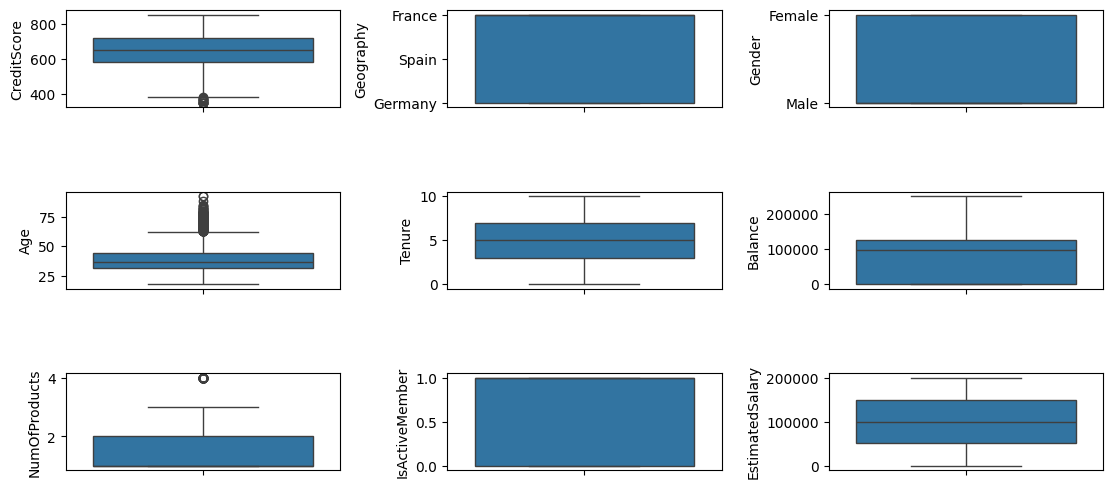

In [18]:
# Create the list column names
cols = list(df.iloc[ : , : -1])

# Create a matrix of subplots(3*3)
fig, axes = plt.subplots(3,3, figsize=(12, 6 ))

# Add padding around the subplots
fig.tight_layout(pad=4.0)

# Create a box plot based on the data
for i in range(len(cols)):
    sns.boxplot(ax=axes[i//3, i%3], y=df[cols[i]])

# Remove Outliers using IQR

In [19]:
df.shape

(10000, 10)

In [20]:
# specify the columns to remove outliers from dataframe
col_names = ["CreditScore", "NumOfProducts"]

# remove outliers for each selected columns using the IQR method
for col in col_names:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


In [21]:
df.shape

(9926, 10)

# Exploratory Data Analysis

In [22]:
df.groupby('Exited')['Exited'].count()

Exited
0    7963
1    1963
Name: Exited, dtype: int64

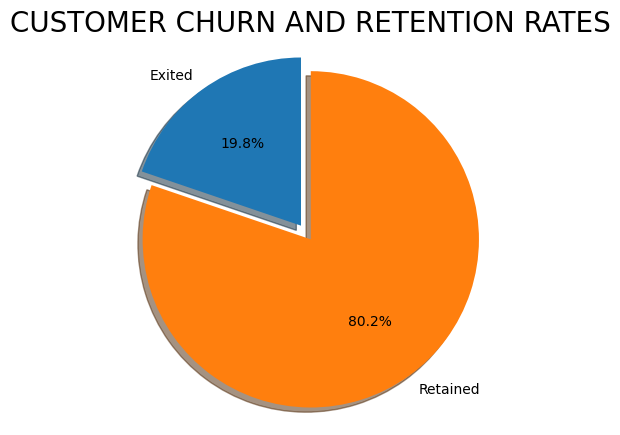

In [23]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(7, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("CUSTOMER CHURN AND RETENTION RATES", size = 20)
plt.show()

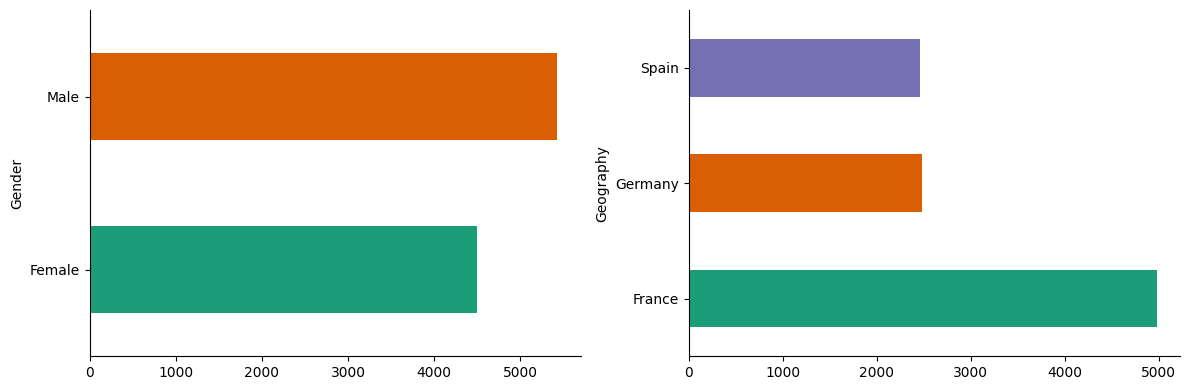

In [24]:
# List of categorical variables to plot
cat_vars = ['Gender', 'Geography']
def cat_plot(col):
  df.groupby(col).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
  plt.gca().spines[['top', 'right',]].set_visible(False)

# Create a chart grid for each categorical variable
plt.figure(figsize=(12, 4))
for i, var in enumerate(cat_vars, 1):
    plt.subplot(1, 2, i)
    cat_plot(var)

# adjust spacing between subplots
plt.tight_layout()

# show plot
plt.show()

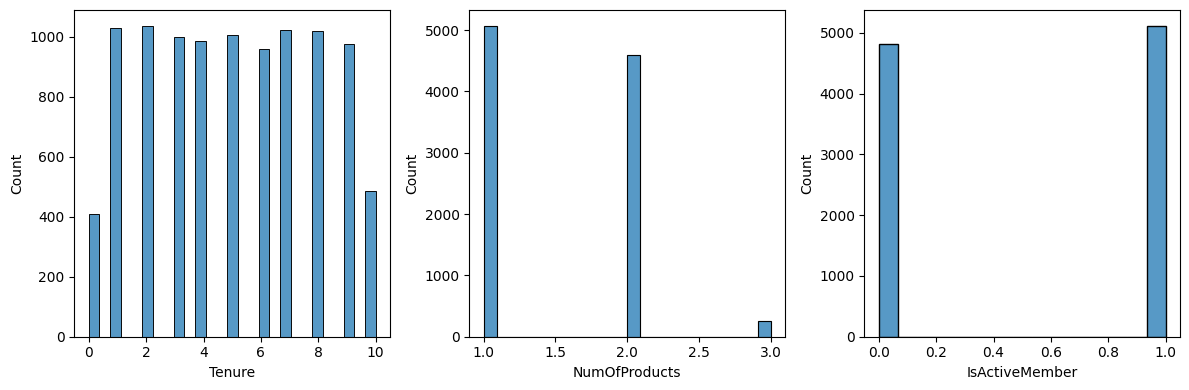

In [25]:
# List of numerical variables to plot
num_vars = ["Tenure", "NumOfProducts", "IsActiveMember"]

# Create a chart grid for each numerical variable
fig, axs = plt.subplots(1, 3, figsize = (12, 4))
axs = axs.ravel()

for i in range(len(num_vars)):
  sns.histplot(df[num_vars[i]], ax = axs[i])

fig.tight_layout()
plt.show()

<Axes: xlabel='Tenure', ylabel='Exited'>

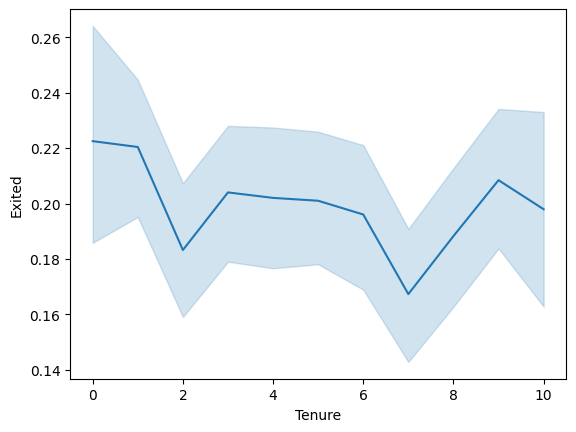

In [26]:
# Distribution of Tenure compare to Exited column
sns.lineplot(x = 'Tenure', y = 'Exited', data = df)

<Axes: xlabel='NumOfProducts', ylabel='Exited'>

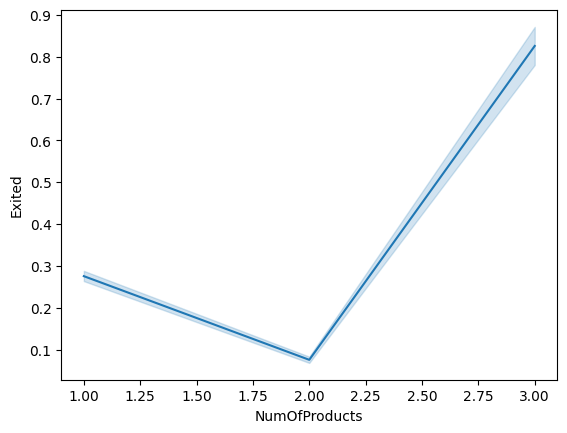

In [27]:
# Distribution of NumOfProducts compare to Exited column
sns.lineplot(x = 'NumOfProducts', y = 'Exited', data = df)

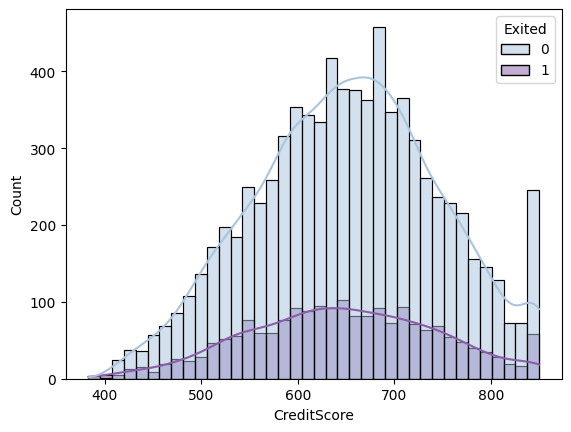

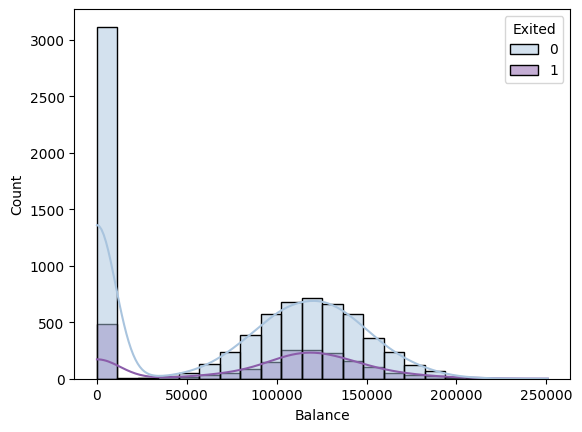

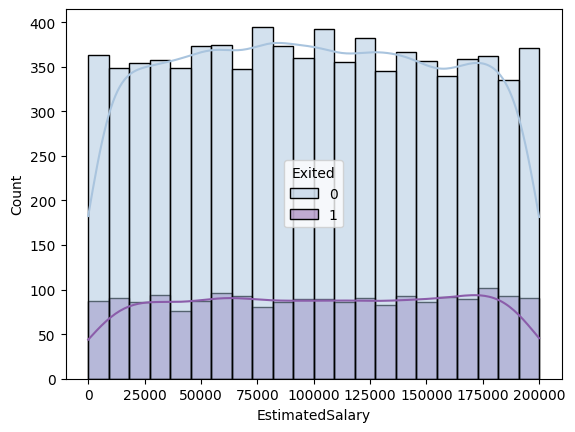

In [28]:
# # Distribution of CreditScore, Balance, EstimatedSalary compare to Exited column
crecol= ['CreditScore', 'Balance', 'EstimatedSalary']
for i in crecol:
    sns.histplot (data = df, x= i, kde = True, hue = 'Exited', fill=True, palette='BuPu' )
    plt.show()

# Scatter plot

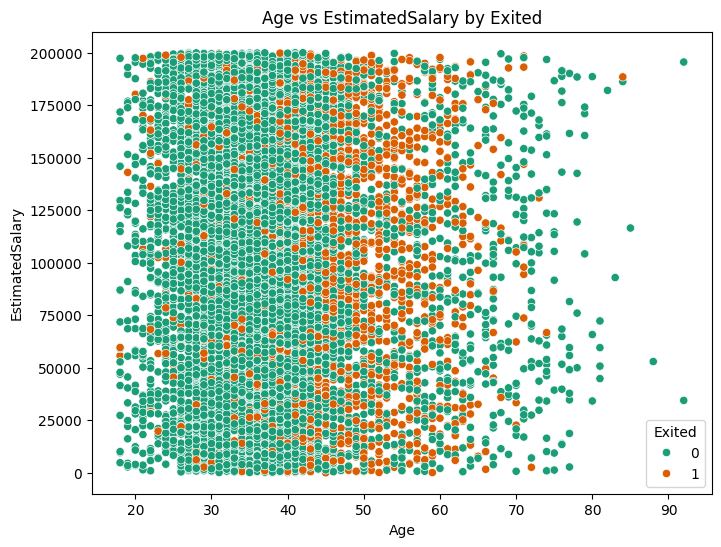

In [29]:
# Age vs EstimatedSalary by Exited
plt.figure(figsize = (8,6))
sns.scatterplot(data = df, x= 'Age', y = 'EstimatedSalary', hue = 'Exited', palette = 'Dark2')
plt.title('Age vs EstimatedSalary by Exited')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.show()

# Feature Engineering


In [30]:
df["BalanceSalaryRatio"] = df["Balance"] / df["EstimatedSalary"]

# Data Preprocessing

In [31]:
scaler = LabelEncoder()
df = df.apply(scaler.fit_transform)

In [32]:
#scale_var = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio']

#scaler = MinMaxScaler()
#df[scale_var] = scaler.fit_transform(df[scale_var])

In [33]:
# Encode labels where dtype is 'object'
#df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
#df['Geography'] = LabelEncoder().fit_transform(df['Geography'])

In [34]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio
0,218,0,0,24,2,0,0,1,5039,1,0
1,207,2,0,23,1,738,0,1,5606,0,1360
2,101,0,0,24,8,5743,2,0,5672,1,3652
3,298,0,0,21,1,0,1,0,4679,0,0
4,449,2,0,25,2,3668,0,1,3903,0,3970


In [35]:
column_list = list(df.iloc[ : , : -1])
column_list.insert(-1, 'BalanceSalaryRatio')
df = df[column_list]
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,BalanceSalaryRatio,Exited
0,218,0,0,24,2,0,0,1,5039,0,1
1,207,2,0,23,1,738,0,1,5606,1360,0
2,101,0,0,24,8,5743,2,0,5672,3652,1
3,298,0,0,21,1,0,1,0,4679,0,0
4,449,2,0,25,2,3668,0,1,3903,3970,0


# Heatmap Correlation

<Axes: >

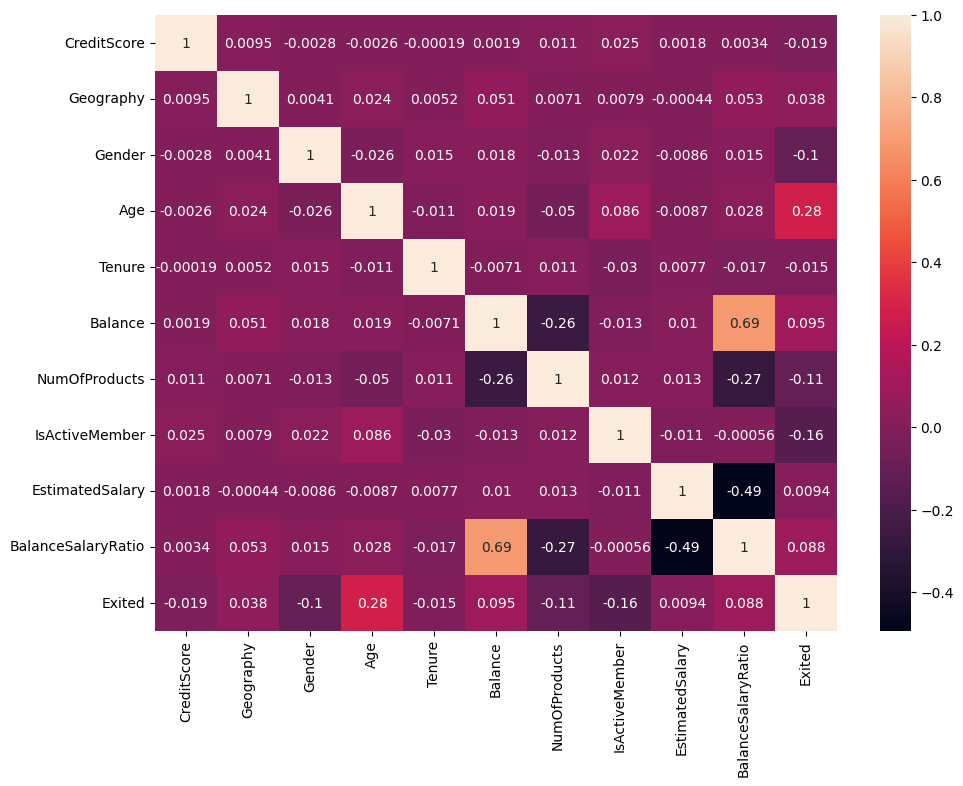

In [36]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize = (11, 8))
sns.heatmap(df.corr(), annot = True)

# Train Test Split

In [37]:
x = df.drop('Exited', axis = 1)
y = df['Exited']

In [38]:
from sklearn import tree
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, matthews_corrcoef, roc_curve

In [39]:
# split data into train and test set (test size 30% and train size 70%)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Decision Tree Classifier

In [40]:
# Create a DecisionRegressor object
model = tree.DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [41]:
# Predict test dataset
y_pred_tree = model.predict(X_test)

In [42]:
from sklearn.metrics import classification_report
from tabulate import tabulate

# Giả sử bạn có y_true và y_pred
report = classification_report(y_test, y_pred_tree, output_dict=True)
report_tree = pd.DataFrame(report).transpose()

print(tabulate(report_tree, headers='keys', tablefmt='fancy_grid'))

╒══════════════╤═════════════╤══════════╤════════════╤═════════════╕
│              │   precision │   recall │   f1-score │     support │
╞══════════════╪═════════════╪══════════╪════════════╪═════════════╡
│ 0            │    0.882402 │ 0.869259 │   0.875782 │ 2417        │
├──────────────┼─────────────┼──────────┼────────────┼─────────────┤
│ 1            │    0.470687 │ 0.500891 │   0.48532  │  561        │
├──────────────┼─────────────┼──────────┼────────────┼─────────────┤
│ accuracy     │    0.799866 │ 0.799866 │   0.799866 │    0.799866 │
├──────────────┼─────────────┼──────────┼────────────┼─────────────┤
│ macro avg    │    0.676545 │ 0.685075 │   0.680551 │ 2978        │
├──────────────┼─────────────┼──────────┼────────────┼─────────────┤
│ weighted avg │    0.804843 │ 0.799866 │   0.802226 │ 2978        │
╘══════════════╧═════════════╧══════════╧════════════╧═════════════╛


<ipython-input-43-f02de7db0b7b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Importance", y = "Feature", data = fi2, palette=palette)


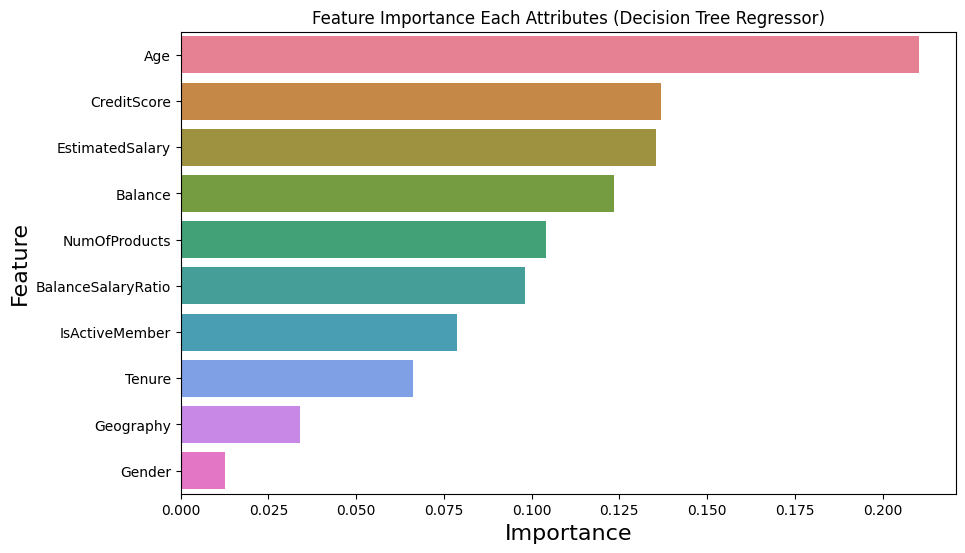

In [43]:
imp_df = pd.DataFrame(\
{
    "Feature": X_train.columns,\
    "Importance": model.feature_importances_
})
fi = imp_df.sort_values(by = "Importance", ascending = False)

fi2 = fi.head(10)


palette = sns.color_palette("husl", len(fi2))


plt.figure(figsize = (10, 6))
sns.barplot(x = "Importance", y = "Feature", data = fi2, palette=palette)
plt.title("Feature Importance Each Attributes (Decision Tree Regressor)")
plt.xlabel("Importance", fontsize = 16)
plt.ylabel("Feature", fontsize = 16)
plt.show()

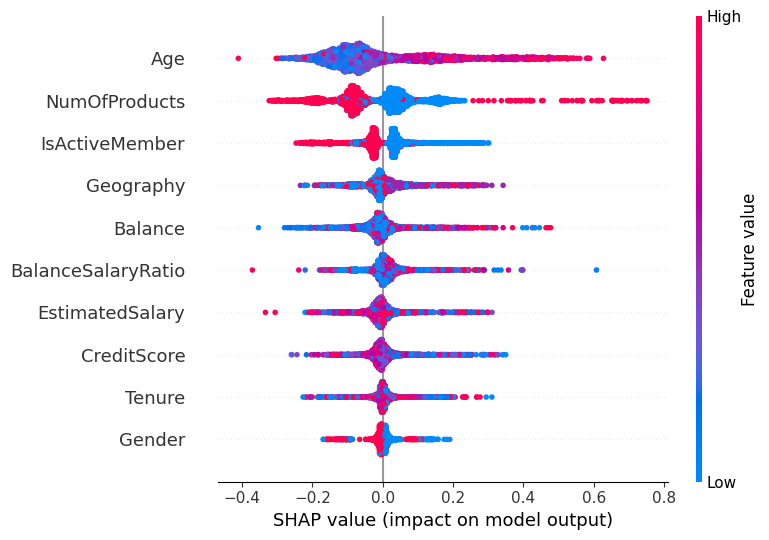

In [44]:
import shap

# Create a SHAP explainer object
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for all data points
shap_values = explainer.shap_values(X_test)

# Plot the summary plot

# Summary plot for all features
shap.summary_plot(shap_values, X_test )

# Data Augmentation

In [45]:
exited = df[df['Exited'] == 1]
existing = df[df['Exited'] == 0]

num_exited = len(exited)
num_existing = len(existing)

# Nếu số lượng mẫu trong nhóm "Existing" lớn hơn 0, thực hiện oversampling
if num_existing > 0:
    # Oversampling nhóm Exited để có số lượng mẫu tương đương với nhóm Existing
    exited_oversampled = resample(exited, replace=True, n_samples=num_existing, random_state=42)

    # Kết hợp lại dữ liệu sau khi oversampling
    data_oversampled = pd.concat([exited_oversampled, existing])

else:
    print("Không thể thực hiện oversampling vì số lượng mẫu trong nhóm 'Existing' là 0.")

In [46]:
data_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15926 entries, 5606 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   CreditScore         15926 non-null  int64
 1   Geography           15926 non-null  int64
 2   Gender              15926 non-null  int64
 3   Age                 15926 non-null  int64
 4   Tenure              15926 non-null  int64
 5   Balance             15926 non-null  int64
 6   NumOfProducts       15926 non-null  int64
 7   IsActiveMember      15926 non-null  int64
 8   EstimatedSalary     15926 non-null  int64
 9   BalanceSalaryRatio  15926 non-null  int64
 10  Exited              15926 non-null  int64
dtypes: int64(11)
memory usage: 1.5 MB


In [47]:
# Tách dữ liệu thành features và target
X = data_oversampled.drop('Exited', axis=1)
y = data_oversampled['Exited']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (train 80%, test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier with default parameters

In [48]:
# instantiate the classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
# Dự đoán trên tập kiểm tra
y_pred_rf = model.predict(X_test)

In [51]:
# Giả sử bạn có y_true và y_pred
report = classification_report(y_test, y_pred_rf, output_dict=True)
report_rf = pd.DataFrame(report).transpose()

print(tabulate(report_rf, headers='keys', tablefmt='fancy_grid'))

╒══════════════╤═════════════╤══════════╤════════════╤═════════════╕
│              │   precision │   recall │   f1-score │     support │
╞══════════════╪═════════════╪══════════╪════════════╪═════════════╡
│ 0            │    0.981183 │ 0.923466 │   0.95145  │ 1581        │
├──────────────┼─────────────┼──────────┼────────────┼─────────────┤
│ 1            │    0.92874  │ 0.982555 │   0.954889 │ 1605        │
├──────────────┼─────────────┼──────────┼────────────┼─────────────┤
│ accuracy     │    0.953233 │ 0.953233 │   0.953233 │    0.953233 │
├──────────────┼─────────────┼──────────┼────────────┼─────────────┤
│ macro avg    │    0.954961 │ 0.95301  │   0.95317  │ 3186        │
├──────────────┼─────────────┼──────────┼────────────┼─────────────┤
│ weighted avg │    0.954764 │ 0.953233 │   0.953183 │ 3186        │
╘══════════════╧═════════════╧══════════╧════════════╧═════════════╛


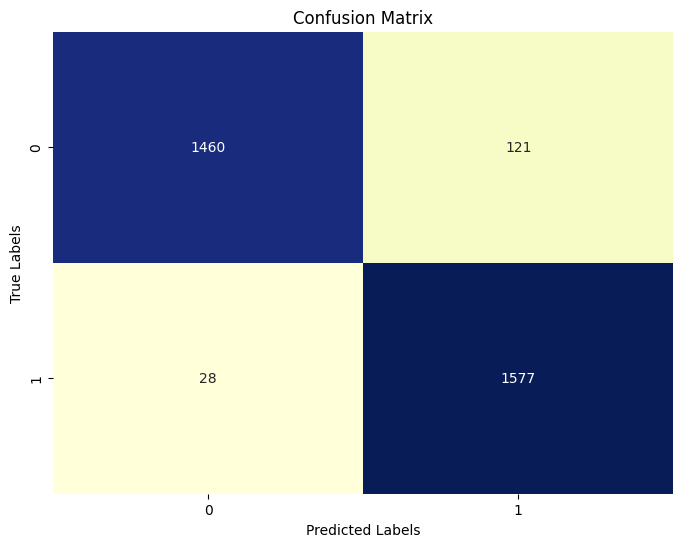

In [53]:
# Tính confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Vẽ confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

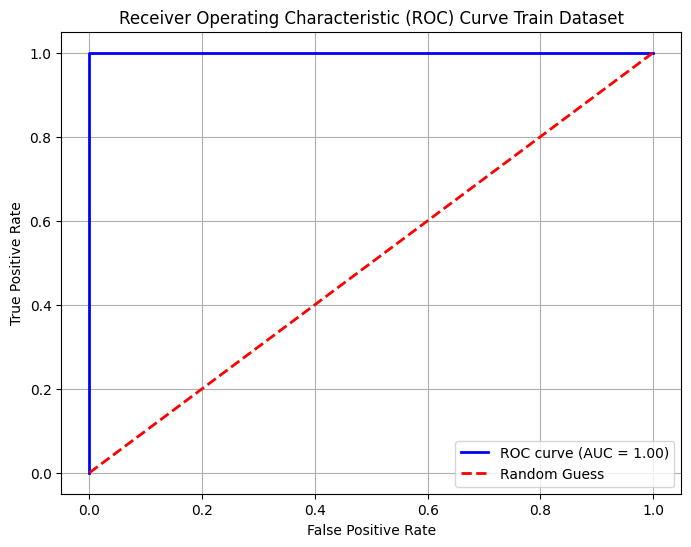

In [54]:
# Compute False Positive Rate (FPR) and True Positive Rate (TPR) for Random Forest model
fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train)[:,1])

# Check ROC Curve
auc = roc_auc_score(y_train, model.predict_proba(X_train)[:,1])

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Train Dataset')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

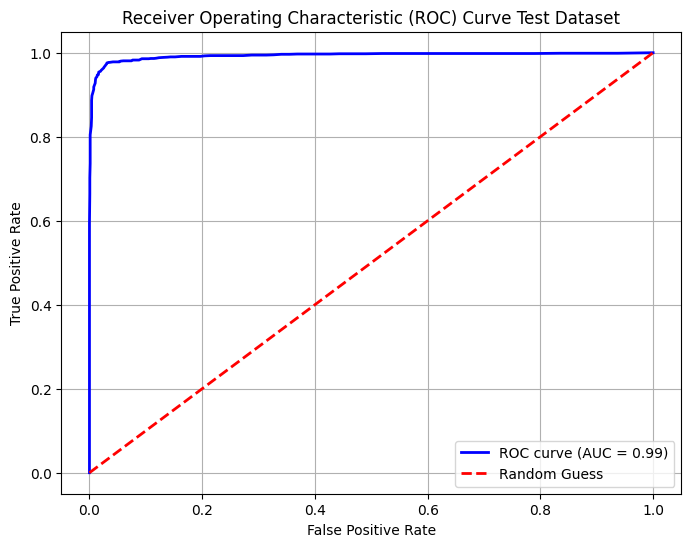

In [55]:
# Compute False Positive Rate (FPR) and True Positive Rate (TPR) for Random Forest model
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

# Check ROC Curve
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Test Dataset')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [56]:
from sklearn.model_selection import cross_val_score

# Thực hiện cross-validation với k=5 fold
scores = cross_val_score(model, X, y, cv=5)


print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.94915254 0.95290424 0.94850863 0.94599686 0.95007849]
Average cross-validation score: 0.9493281536865072


# Feature Importance

<ipython-input-57-81cd2a1679eb>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Importance", y = "Feature", data = fi2, palette=palette)


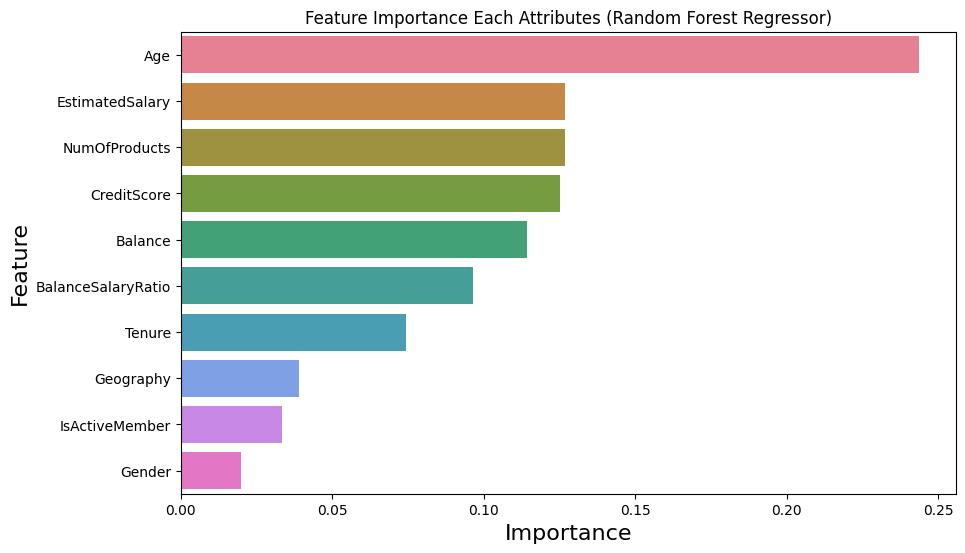

In [57]:
imp_df = pd.DataFrame(\
{
    "Feature": X_train.columns,\
    "Importance": model.feature_importances_
})
fi = imp_df.sort_values(by = "Importance", ascending = False)

fi2 = fi.head(10)

palette = sns.color_palette("husl", len(fi2))


plt.figure(figsize = (10, 6))
sns.barplot(x = "Importance", y = "Feature", data = fi2, palette=palette)
plt.title("Feature Importance Each Attributes (Random Forest Regressor)")
plt.xlabel("Importance", fontsize = 16)
plt.ylabel("Feature", fontsize = 16)
plt.show()